# Regularization and Normalization


  
## Overfitting
- Overfitting is a situation where a network performs well with training data but poorly with test data.
- If there is high accuracy with the training data but low with the test data, then the model is overfit.
- The model can only recognize training data and fails with testing data. Entrusting it with new data will therefore result in poor performance.



## Illustration of Overfitting
- The illustration of model fitted on training data points only. It fails to recognize any point from the testing data.
- If there's high training accuracy but low validation accuracy, it's called overfitting.
- A curve representing an overfitted model was shown using a green line on a plot.



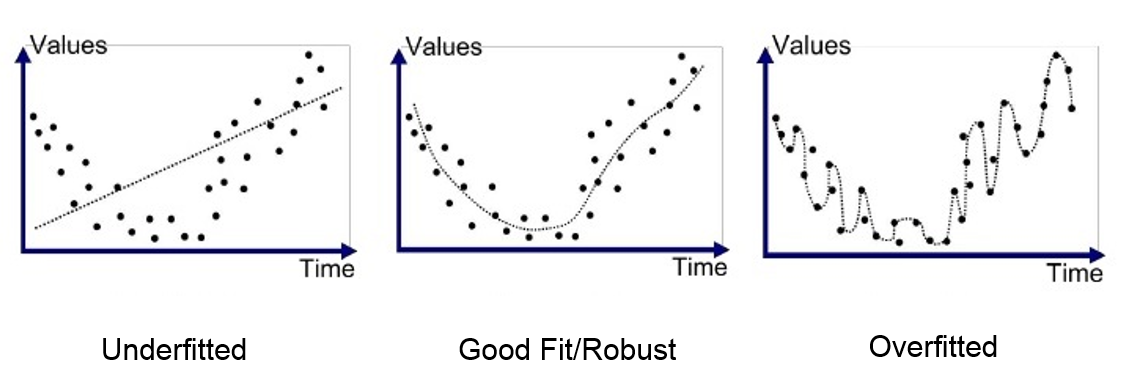

## Regularization
- Regularization is introduced to avoid overfitting in the model.
- The aim is to change the green overfitting line into a black regularized line.



### Reducing Overfitting Without Regularization
- Training on more data.
- Using data augmentation like generating versions of an image.
- Employing early stopping: terminate the training when validation error starts increasing or stagnates.



### Using Regularization Techniques
- The following are regularization techniques that can aid in reducing overfitting:
  - L1 and L2 regularization
  - Dropout
- Another method that closely aligns with regularization is the use of batch normalization.


#L1 and L2 Regularization

- Look at this dataset, do you think name should have any impact on exam score?
- Regularization technique help use remove the dependency of non-relevant features to impact our output.
- In deep-learning, the model learns how to select features unlike ML where we use statistical concepts to decide which feature to use and which one to remove.


## Feature Selection
- In machine learning, feature selection is paramount. It involves picking out the key features that significantly correlate with outputs.
- Dependent features (those correlated with outputs) are more desirable than independent ones.
- Features should be independent of each other to avoid redundancy.
- Traditional machine learning techniques involved manual removal of irrelevant features using statistical methods like T-tests or cross correlation.

## Embedded Feature Selection
- In deep learning, feature selection process changes to learning how to select features. This is called embedded feature selection.
- Neural networks implement L1 and L2 regularization, which causes irrelevant features to ideally have a weight close to zero.

## Impact of Irrelevant Features
- Irrelevant and too many features cause overfitting in a network since they add noise to the dataset.
- L1 and L2 regularization techniques also reduce the total number of features, helping the network to overcome overfitting.



## L1 and L2 Regularization Techniques

### L1 Regularization
- It's implemented by adding a term to the loss function; summation of the absolute value of the weights of the model.
- A lambda parameter is used to balance the regularization where high lambda causes all weights to be zero and low lambda renders the regularization ineffective.
  - lambda = 0 means **NO regularization**
  - lambda = 1 means **NO learning** because to minimize the loss weights will be set to 0
  - lambda = 0.5 therefore, is a good point to start with.

### L2 Regularization
- Compared to L1 regularization, L2 Regularization involves adding the square of the weights to the loss function instead of the absolute value.
- The lambda parameter in L2 Regularization is divided by two to ease calculation of the gradient. This means a portion of the weight is subtracted from the weight itself.



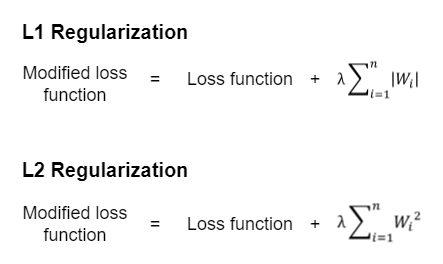

In [ ]:
binary_cross_entrophy_loss = nn.BCE() + sum of all the weights

# Dropout Regularization in Neural Networks

## Understanding Dropout
- Dropout is a popularly used regularization technique in deep learning.
- In standard neural networks, neurons or features often learn to depend heavily on particular neurons from the previous layer.
- This dependence might lead to overfitting since the model might perform poorly when these specific neurons are not present during testing with unseen data.
- Dropout addresses this issue by randomly disabling a fraction of neurons in a layer during the training time. This forces the model to derive information from a wide range of neurons rather than depending on specific ones.
  


## Role of Dropout
- Dropout introduces robustness in the network by promoting the development of more generalized features.
- It essentially reduces the dependency of neurons on each other, promoting better performance on unseen data.
- Because dropout randomly "drops" or zeroes out a fraction of neurons in a specific layer at each iteration during training, the model can gather information from a diverse set of features.
- This, in turn, helps the model extract crucial information from all the different features and not just specific ones.


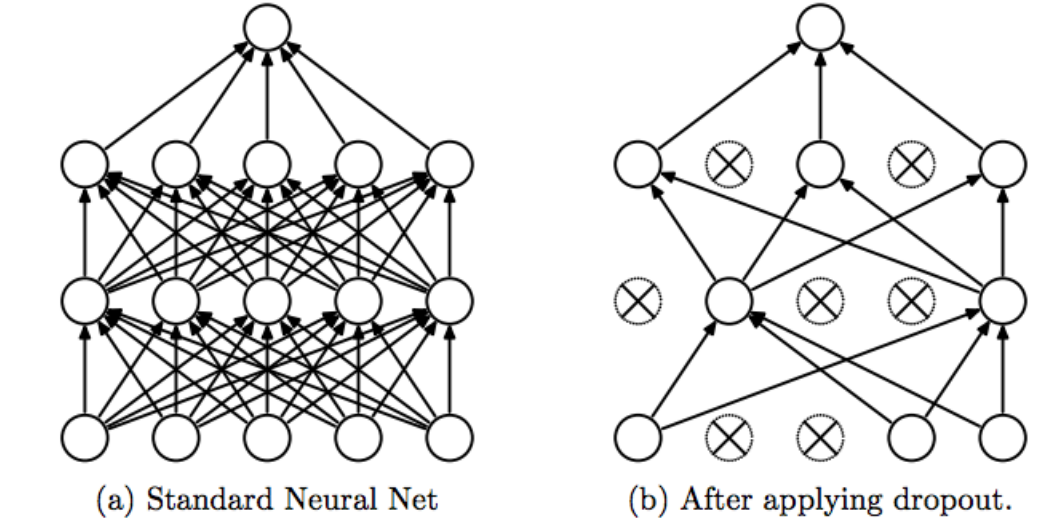

- We apply dropout in pyTorch by simply calling the dropout layer
- [Dropout in PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)

# Data Normalization and Standardization

## Introduction
- Normalization and Standardization are pretrained techniques used to ensure data points are on the same scale, which is pivotal in preventing high-dominance of larger values over smaller ones in datasets.

## Normalization
- Normalization converts all data points to fall within a certain range (usually 0 to 1).
- It helps to prevent issues like instability in the network and exploding gradient problem.
- A popular method to achieve normalization is **Min-Max Normalization**.



### Min-Max Normalization
- This scales the data to have values between zero and one.
- The formula for Min-Max Normalization is (each data point - minimum value) divided by (maximum value - minimum value).
    - Example: For data points 44, 23, and 56;
        - For 44, (44-23)/(56-23)=0.63,
        - for 23 (the minimum), the output is 0,
        - for 56 (the maximum), the output is 1.



## Standardization  
- Standardization technique transforms data to have a mean of zero and a standard deviation of one.
- This is generally preferred and is often referred to as a normalization. It is used in Batch Normalization and Layer Normalization.


### Performing Standardization  
- We first calculate the mean (sum of all data points divided by their number).
- Next, the standard deviation is computed (based on the standard formula).
- Finally, we perform standardization by using formula (data point - mean)/ standard deviation.
    - Example: For the data points 44, 23, 56;
        - for 44, (44-41)/13.64 = 0.22,
        - for 23, (23-41)/13.64 = -1.32,
        - for 56, (56-41)/13.64 = 1.10.

It's important to note the choice between normalization or standardization depends on the data and the specific application.

# Batch Normalization in Neural Networks

## Understanding the Importance of Normalization

- In a Neural Network with two inputs, one ranging from 0 to 1 and the other from 0 to 0.01, the larger values tend to dominate the smaller ones if normalization isn't applied.

- If normalization is not done, the weights related with values ranging from 0 to 0.01 are likely to be ignored because the network is engaged on updates of the larger values thereby causing unstable training.

- By normalizing the inputs, allows the network to quickly learn the optimal parameters with less fluctuation assisting in the faster and smoother convergence.

## Batch Normalization Overview

- Batch Normalization is introduced as a solution to normalize the inputs at each layer rather than specifically at the input layer.

- The main goal of batch normalization is to reduce the amount of shifting around of the hidden layer values.

- We normalize the output of every neuron across the samples in a batch to have mean zero and variance one.

- The mean and standard deviation are calculated across a batch of samples resulting in normalized outputs.



## Batch Normalization Calculation

- The variation between batch normalization and simple normalization is the inclusion of two learnable parameters which are used to scale and shift the normalized output.

- Here's how it is done:
    - At first, calculate the mean and variance of output neurons in a batch.
    - Next, normalize the values: `(value - mean) / sqrt(variance + epsilon)`, where `epsilon` is very small to prevent division by zero.
    - Then, scale and shift the normalized outputs using learnable parameters: `gamma * normalizedOutput + beta`. `gamma` and `beta` are learned during training.
- Let's do it on my fav tool.
- Obviously you dont have to calculate anything on your own because pyTorch has done it for us.
- [Batch Normalization in pyTorch](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html)

## Benefits of Batch Normalization

- Converges faster.
- Reduces the need for dropout.
- Allows the network to normalize a layer into the most optimal distribution for learning.
- Eliminating need for a bias for a specific layer, as the `beta` parameter in the formula already takes on the function of bias.  


# Layer Normalization


## Key Concepts
- **Batch Normalization vs. Layer Normalization:**
  - Visualize differences:
    - Batch normalization: Normalizes each output neuron based on batch of samples.
    - Layer normalization: Normalizes each feature in a layer based on features in that layer.
  - Calculation differences:
    - Batch normalization: Mean and standard deviation across batch samples.
    - Layer normalization: Mean and standard deviation across layer features.
  - Formulation similarities:
    - Scaling and shifting by learnable parameters (gamma and beta).
  
## Formulation
- **Mean Calculation:**
  - Calculate mean across neurons in the layer.
- **Variance Calculation:**
  - Subtract mean, square, and sum for all output neurons.
- **Normalization:**
  - Normalize each neuron's output using mean and standard deviation.
- **Scaling and Shifting:**
  - Scale by gamma, shift by beta.
   